In [1]:
# I exported the Weekly dataset from R Using write.csv(Weekly, "C:/Users/cichr/Documents/ISLR work/Weekly.csv")
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
converters = {'a': int, 'b': int, 'c': int}
Weekly = pd.read_csv('Weekly.csv', converters=converters)
Weekly.shape

(1089, 9)

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
Weekly['Direction2'] = Weekly.Direction.factorize()[0]
Weekly.head(20)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
0,1990,0.82,1.57,-3.94,-0.23,-3.48,0.15,-0.27,Down,0
1,1990,-0.27,0.82,1.57,-3.94,-0.23,0.15,-2.58,Down,0
2,1990,-2.58,-0.27,0.82,1.57,-3.94,0.16,3.51,Up,1
3,1990,3.51,-2.58,-0.27,0.82,1.57,0.16,0.71,Up,1
4,1990,0.71,3.51,-2.58,-0.27,0.82,0.15,1.18,Up,1
5,1990,1.18,0.71,3.51,-2.58,-0.27,0.15,-1.37,Down,0
6,1990,-1.37,1.18,0.71,3.51,-2.58,0.15,0.81,Up,1
7,1990,0.81,-1.37,1.18,0.71,3.51,0.13,0.04,Up,1
8,1990,0.04,0.81,-1.37,1.18,0.71,0.14,1.25,Up,1
9,1990,1.25,0.04,0.81,-1.37,1.18,0.13,-2.68,Down,0


In [4]:
Weekly.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
count,"1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00",1089,"1,089.00"
unique,nan,nan,nan,nan,nan,nan,nan,nan,2,nan
top,nan,nan,nan,nan,nan,nan,nan,nan,Up,nan
freq,nan,nan,nan,nan,nan,nan,nan,nan,605,nan
mean,"2,000.05",0.15,0.15,0.15,0.15,0.14,1.57,0.15,NaN,0.56
std,6.03,2.36,2.36,2.36,2.36,2.36,1.69,2.36,NaN,0.50
min,"1,990.00",-18.20,-18.20,-18.20,-18.20,-18.20,0.09,-18.20,NaN,0.00
25%,"1,995.00",-1.15,-1.15,-1.16,-1.16,-1.17,0.33,-1.15,NaN,0.00
50%,"2,000.00",0.24,0.24,0.24,0.24,0.23,1.00,0.24,NaN,1.00
75%,"2,005.00",1.41,1.41,1.41,1.41,1.41,2.05,1.41,NaN,1.00


In [5]:
Weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction2
Year,1.00,-0.03,-0.03,-0.03,-0.03,-0.03,0.84,-0.03,-0.02
Lag1,-0.03,1.00,-0.07,0.06,-0.07,-0.01,-0.06,-0.08,-0.05
Lag2,-0.03,-0.07,1.00,-0.08,0.06,-0.07,-0.09,0.06,0.07
Lag3,-0.03,0.06,-0.08,1.00,-0.08,0.06,-0.07,-0.07,-0.02
Lag4,-0.03,-0.07,0.06,-0.08,1.00,-0.08,-0.06,-0.01,-0.02
Lag5,-0.03,-0.01,-0.07,0.06,-0.08,1.00,-0.06,0.01,-0.02
Volume,0.84,-0.06,-0.09,-0.07,-0.06,-0.06,1.00,-0.03,-0.02
Today,-0.03,-0.08,0.06,-0.07,-0.01,0.01,-0.03,1.00,0.72
Direction2,-0.02,-0.05,0.07,-0.02,-0.02,-0.02,-0.02,0.72,1.00


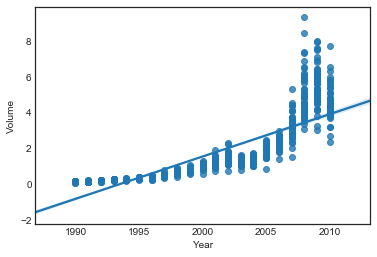

In [6]:
sns.regplot(Weekly.Year, Weekly.Volume)

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


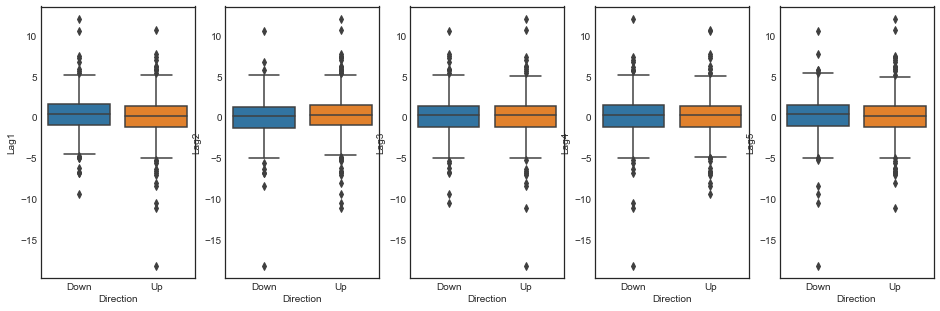

In [7]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot2grid((1, 5), (0, 0))
ax2 = plt.subplot2grid((1, 5), (0, 1))
ax3 = plt.subplot2grid((1, 5), (0, 2))
ax4 = plt.subplot2grid((1, 5), (0, 3))
ax5 = plt.subplot2grid((1, 5), (0, 4))
sns.boxplot(x="Direction", y="Lag1", data=Weekly, ax=ax1)
sns.boxplot(x="Direction", y="Lag2", data=Weekly, ax=ax2)
sns.boxplot(x="Direction", y="Lag3", data=Weekly, ax=ax3)
sns.boxplot(x="Direction", y="Lag4", data=Weekly, ax=ax4)
sns.boxplot(x="Direction", y="Lag5", data=Weekly, ax=ax5)

In [8]:
X_train = sm.add_constant(Weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
y = Weekly.Direction2
est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.27,0.09,3.11,0.00,0.10,0.44
Lag1,-0.04,0.03,-1.56,0.12,-0.09,0.01
Lag2,0.06,0.03,2.18,0.03,0.01,0.11
Lag3,-0.02,0.03,-0.60,0.55,-0.07,0.04
Lag4,-0.03,0.03,-1.05,0.29,-0.08,0.02
Lag5,-0.01,0.03,-0.55,0.58,-0.07,0.04
Volume,-0.02,0.04,-0.62,0.54,-0.10,0.05


Lag2 appears to be statistically significant.

In [10]:
glmprobs = est.predict()
glmpred = np.repeat("Down", 1089)
glmpred[glmprobs>.5] = "Up"
df_ = pd.DataFrame({'Actual Direction': Weekly.Direction, 'Predicted Direction': glmpred})
df_.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')
np.mean(glmpred==Weekly.Direction)

0.56106519742883376

The model prediction was right 56% of the time. 430 times the model predicted an up movement but a down movement occurred. 48 times the model predicted a down movement but an up movement occurred.

In [20]:
WeeklyTest=Weekly[Weekly.Year>=2009]
WeeklyTrain=Weekly[Weekly.Year<2009]
WeeklyTest.shape

(104, 10)

In [27]:
X_train2 = sm.add_constant(WeeklyTrain[['Lag2']])
X_test2 = sm.add_constant(WeeklyTest[['Lag2']])
y2 = WeeklyTrain.Direction2
est2 = smf.Logit(y2, X_train2).fit()
glmprobs2 = est2.predict(X_test2)
glmpred2 = np.repeat("Down", 104)
glmpred2[glmprobs2>.5] = "Up"
df_2 = pd.DataFrame({'Actual Direction': WeeklyTest.Direction, 'Predicted Direction': glmpred2})
df_2.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


Actual Direction,Down,Up
Predicted Direction,,
Down,9,5
Up,34,56


In [29]:
np.mean(glmpred2==WeeklyTest.Direction)

0.625

The overall fraction of correct predictions for the held out data is 62.5%.

In [31]:
X_train3 = WeeklyTrain[['Lag2']].as_matrix()
X_test3 = WeeklyTest[['Lag2']].as_matrix()
y3 = WeeklyTrain.Direction2.as_matrix()
lda = LinearDiscriminantAnalysis(solver='svd')
est3 = lda.fit(X_train3, y3)
ldaprobs = est3.predict(X_test3)
ldapred = np.repeat("Down", 104)
ldapred[ldaprobs>.5] = "Up"
df_3 = pd.DataFrame({'Actual Direction': WeeklyTest.Direction, 'Predicted Direction': ldapred})
df_3.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')

Actual Direction,Down,Up
Predicted Direction,,
Down,9,5
Up,34,56


In [36]:
X_train4 = WeeklyTrain[['Lag2']].as_matrix()
X_test4 = WeeklyTest[['Lag2']].as_matrix()
y4 = WeeklyTrain.Direction2.as_matrix()
qda = QuadraticDiscriminantAnalysis()
est4 = qda.fit(X_train4, y4)
qdaprobs = est4.predict(X_test4)
qdapred = np.repeat("Down", 104)
qdapred[qdaprobs>.5] = "Up"
df_4 = pd.DataFrame({'Actual Direction': WeeklyTest.Direction, 'Predicted Direction': qdapred})
df_4.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')

Actual Direction,Down,Up
Predicted Direction,,
Up,43,61


In [54]:
X_train5 = WeeklyTrain[['Lag2']].as_matrix()
X_test5 = WeeklyTest[['Lag2']].as_matrix()
y5 = WeeklyTrain.Direction2.as_matrix()
np.random.seed(1)
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
est5 = knn.fit(X_train5, y5)
knnprobs = est5.predict(X_test5)
knnpred = np.repeat("Down", 104)
knnpred[knnprobs>.5] = "Up"
df_5 = pd.DataFrame({'Actual Direction': WeeklyTest.Direction, 'Predicted Direction': knnpred})
df_5.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')

Actual Direction,Down,Up
Predicted Direction,,
Down,21,31
Up,22,30


In [55]:
np.mean(knnpred==WeeklyTest.Direction)

0.49038461538461536

The GLM (logistic regression) and LDA methods appear to be a tie for providing the best results on this data.

In [57]:
#try KNN with K=4
X_train5 = WeeklyTrain[['Lag2']].as_matrix()
X_test5 = WeeklyTest[['Lag2']].as_matrix()
y5 = WeeklyTrain.Direction2.as_matrix()
np.random.seed(1)
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
est5 = knn.fit(X_train5, y5)
knnprobs = est5.predict(X_test5)
knnpred = np.repeat("Down", 104)
knnpred[knnprobs>.5] = "Up"
df_5 = pd.DataFrame({'Actual Direction': WeeklyTest.Direction, 'Predicted Direction': knnpred})
df_5.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')

Actual Direction,Down,Up
Predicted Direction,,
Down,26,27
Up,17,34


These results are different from what I obtained using R's class package's knn() function. Perhaps due to the tiebreaking methodology? https://stats.stackexchange.com/questions/144718/how-does-scikit-learn-resolve-ties-in-the-knn-classification

In [59]:
np.mean(knnpred==WeeklyTest.Direction)

0.57692307692307687

In [72]:
#run a glm with a bunch of interactions to see what might be significant
#use the statsmodels formula version. Use the smf library and use the lowercase version of the logit function
#see http://www.statsmodels.org/dev/example_formulas.html
est6 = smf.logit(formula='Direction2 ~Lag2 + Lag1*Lag2 + Lag2*Lag3 + Lag3*Lag4 + Lag4*Lag5 + Lag1*Lag3 + Lag2*Lag4 + Lag3*Lag5 + Lag1*Lag4 + Lag2*Lag5 + Lag1*Lag5', data=WeeklyTrain).fit()
est6.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.678905
         Iterations 5


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,0.23,0.07,3.47,0.00,0.10,0.36
Lag2,0.05,0.03,1.67,0.09,-0.01,0.12
Lag1,-0.05,0.03,-1.58,0.11,-0.11,0.01
Lag1:Lag2,0.00,0.01,0.37,0.71,-0.01,0.02
Lag3,-0.01,0.03,-0.17,0.87,-0.07,0.06
Lag2:Lag3,0.00,0.01,0.23,0.82,-0.01,0.02
Lag4,-0.03,0.03,-0.97,0.33,-0.09,0.03
Lag3:Lag4,0.01,0.01,1.65,0.10,-0.00,0.03
Lag5,-0.02,0.03,-0.77,0.44,-0.09,0.04
Lag4:Lag5,-0.01,0.01,-0.82,0.41,-0.03,0.01


In [86]:
#try adding lag3 and lag4 interaction
est7 = smf.logit(formula ='Direction2 ~ Lag2 + Lag3:Lag4', data=WeeklyTrain).fit()
glmprobs7 = est7.predict(WeeklyTest)
glmpred7 = np.repeat("Down", 104)
glmpred7[glmprobs7>.5] = "Up"
df_7 = pd.DataFrame({'Actual Direction': WeeklyTest.Direction, 'Predicted Direction': glmpred7})
df_7.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')

Optimization terminated successfully.
         Current function value: 0.684352
         Iterations 5


Actual Direction,Down,Up
Predicted Direction,,
Down,10,3
Up,33,58


In [87]:
#use the patsy library to handle making the design matrixes for LDA with the interaction terms
from patsy import dmatrices, dmatrix
X_train8 = dmatrix("Lag2 + Lag3:Lag4", WeeklyTrain)
X_test8 = dmatrix("Lag2 + Lag3:Lag4", WeeklyTest)
y8 = WeeklyTrain.Direction2.as_matrix()
lda = LinearDiscriminantAnalysis(solver='svd')
est8 = lda.fit(X_train8, y8)
ldaprobs = est8.predict(X_test8)
ldapred = np.repeat("Down", 104)
ldapred[ldaprobs>.5] = "Up"
df_8 = pd.DataFrame({'Actual Direction': WeeklyTest.Direction, 'Predicted Direction': ldapred})
df_8.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Actual Direction,Down,Up
Predicted Direction,,
Down,10,3
Up,33,58


In [92]:
#try adding lag3 and lag4 and volume squared
est9 = smf.logit(formula ='Direction2 ~ Lag2 + Lag3*Lag4 + I(Volume**2)', data=WeeklyTrain).fit()
glmprobs9 = est9.predict(WeeklyTest)
glmpred9 = np.repeat("Down", 104)
glmpred9[glmprobs9>.5] = "Up"
df_9 = pd.DataFrame({'Actual Direction': WeeklyTest.Direction, 'Predicted Direction': glmpred9})
df_9.groupby(['Predicted Direction','Actual Direction']).size().unstack('Actual Direction')

Optimization terminated successfully.
         Current function value: 0.683633
         Iterations 5


Actual Direction,Down,Up
Predicted Direction,,
Down,17,20
Up,26,41


The best method appears to be a tie: GLM or LDA with Lag2 and an added interaction of Lag3 and Lag4.